In [1]:
import import_ipynb
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from utilities.UtilityFunctions import retrieve_reviews_df, preprocessing, retrieve_processed_reviews_df, vectorize

importing Jupyter notebook from UtilityFunctions.ipynb


In [2]:
reviews_df = retrieve_reviews_df()
reviews_df.head()

Concatenating ../data\Reviews-1.csv
Concatenating ../data\Reviews-2.csv
Concatenating ../data\Reviews-3.csv
Concatenating ../data\Reviews-4.csv


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
# number of null values per column
reviews_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Preprocessing Dataframe and Text

In [5]:
df = preprocessing(reviews_df)
df.head()

,Id,Score,Summary,Text,Sentiment
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,1


<BarContainer object of 3 artists>

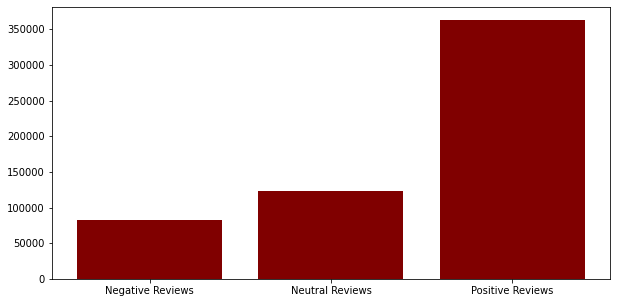

In [6]:
neg = len(df.loc[df['Sentiment'] == -1]['Text'])
neut = len(df.loc[df['Sentiment'] == 0]['Text'])
pos = len(df.loc[df['Sentiment'] == 1]['Text'])

h = ['Negative Reviews', 'Neutral Reviews', 'Positive Reviews']
vals = [neg,neut,pos]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(h, vals, color ='maroon')

We can see our data is heavily skewed and we have a disportionate number of positive reviews. This may impact our model's ability to accurately predict negative review or neutral reviews. This in turn could lead to a higher true positive rate but also a higher false positive rate meaning we'd have a more sensitive and specific model.

Because our dataset is pretty big, we will run some of these cleaning methods on a smaller portion of the dataset. Some text cleaning:

In [7]:
test = df.loc[0:10,:]
text_preprocess(test, ['html', 'stop', 'punc', 'lower'])

<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [8]:
# text_preprocess(df, ['html', 'stop', 'punc', 'lower'])
# df.to_csv("processed_data.csv", index=False)
df = retrieve_processed_reviews_df

Word clouds of different sentiment reviews:

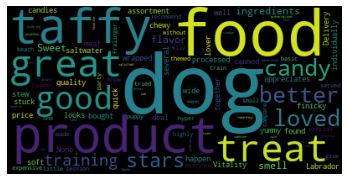

In [9]:
text = df.loc[df['Sentiment'] == 1]['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

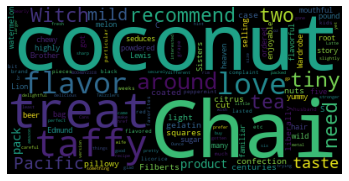

In [10]:
text = df.loc[df['Sentiment'] == 0]['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

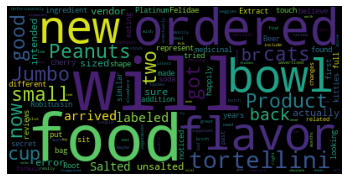

In [11]:
text = df.loc[df['Sentiment'] == -1]['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

These wordclouds allow us to see frequent words in different sentiments. From these plots we can see another potential issue. Our model may start to associate neutral words with positive or negative sentiments. Because the products these reviews come from have a star rating and many of the reviews come from these same products, we are left with many reviews for the same product in the same sentiment category. Of course many of these reviews also mention the name of the product (i.e. dog food) and so these words become the most frequent in this sentiment category thus creating an issue for us. Unfortunately, dropping product names may be too tedious of a task so we have not yet decided how to proceed. 

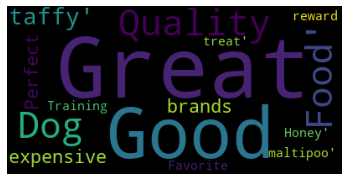

In [12]:
text = df.loc[df['Sentiment'] == 1]['Summary'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

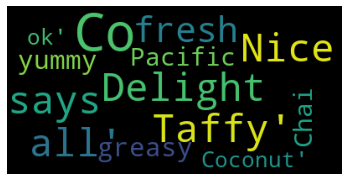

In [13]:
text = df.loc[df['Sentiment'] == 0]['Summary'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

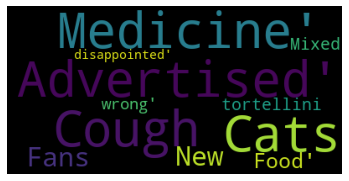

In [14]:
text = df.loc[df['Sentiment'] == -1]['Summary'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Looking at the wordclouds for the summaries, we notice slightly better results in that frequent words are not as neutral as words from the reviews themselves. There are still product names especially in the negative summaries but overall, models trained on the summaries may be able to generalize a little better than models trained on the reviews.

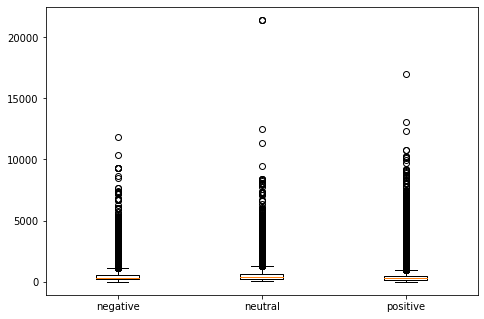

In [15]:
neg = []
neut = []
pos = []

for i in df.loc[df['Sentiment'] == 1]['Text'].values:
    pos.append(len(i))
    
for i in df.loc[df['Sentiment'] == 0]['Text'].values:
    neut.append(len(i))
    
for i in df.loc[df['Sentiment'] == -1]['Text'].values:
    neg.append(len(i))
    
neg = np.array(neg)
neut = np.array(neut)
pos = np.array(pos)

data = [neg, neut, pos]
 
fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['negative', 'neutral', 'positive'])
 
# show plot
plt.show()

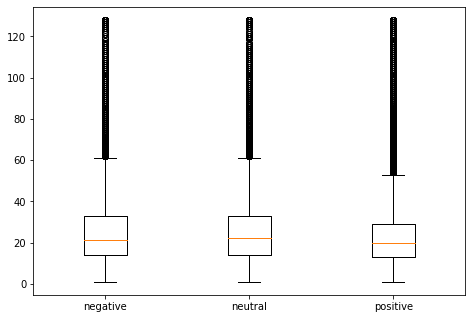

In [16]:
neg = []
neut = []
pos = []

for i in df.loc[df['Sentiment'] == 1]['Summary'].values:
    pos.append(len(i))
    
for i in df.loc[df['Sentiment'] == 0]['Summary'].values:
    neut.append(len(i))
    
for i in df.loc[df['Sentiment'] == -1]['Summary'].values:
    neg.append(len(i))
    
neg = np.array(neg)
neut = np.array(neut)
pos = np.array(pos)

data = [neg, neut, pos]
 
fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['negative', 'neutral', 'positive'])
 
# show plot
plt.show()

Plotting average sentence length in reviews and summaries per sentiment. 

# Tokenization and Vectorization

Implementing Bag of Words strategy
Text preprocessing:
- Tokenization (breaking sentences into words)
- Stopwords (filtering "the", "are", etc)
- Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
- Feature Vector (converts the dictionary of text documents into a feature vector)

In [17]:
#Split before hand but for now..
X_train = df['Text']
y_train = df['Sentiment']
X_train_counts, X_train_tfidf = vectorize(X_train)

In [18]:
X_train_counts.shape

(568427, 120252)

Here we have 568427 training samples and 12052 distinct words in our training sample.

Term Frequencies (Tf) divides number of occurrences for each word by total number of words
Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

In [19]:
X_train_tfidf.shape

(568427, 120252)